# Linear regression

The materials used in this tutorial are based on the applied exercises provided in the book <font color="orange">"An Introduction to Statistical Learning with Applications in R"</font> (ISLR). We are trying to demonstrate how to use R to carry out linear regression analysis on real-world datasets. Besides the exercises that we are going to cover in this tutorial, it is worth trying the other applied exercises by yourself.

## Question 1 Analyzing the Auto data set with Multiple Linear Regression

The first question is about applying multiple linear regression to analyzing the **Auto** dataset. You are going to 
* explore the correlation between variables, 
* use <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/lm.html">lm()</a> to build a multiple linear regression with <font color="orange">mpg</font> as the response variable. Building the regression model is just one simple step. You will learn to interpret the output of the <font color="blue">lm()</font> function using the <a href="https://stat.ethz.ch/R-manual/R-devel/library/base/html/summary.html">summary()</a> function.
* use the <font color="blue">plot()</font> function to produce diagnostic plots, e.g., residual plot and QQ plot.
* explore possible interaction between variables
* study how different variable transformations will affect the model.

Firstly, let's start with importing the <font color="red">ISLR</font> library used in the textbook.

In [1]:
# install.packages("ISLR", repos='http://cran.us.r-project.org')
library(ISLR)

Next, the data should be loaded and inspected.

In [2]:
# If you downloaded and stored the CSV locally in your computer
# Auto = read.csv("Auto.csv", header = T, na.strings = "?")
# If not, you can use the read.csv() function to read the file directly from the web.
Auto = read.csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv", header = T, na.strings = "?")
Auto = na.omit(Auto) # if there are missing values.
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


The dataset contains 392 observations on the following 9 variables. (The following detail is copied and pasted from <a href="https://cran.r-project.org/web/packages/ISLR/ISLR.pdf">here</a>)
* <font color="orange">mpg</font> miles per gallon
* <font color="orange">cylinders</font> Number of cylinders between 4 and 8 displacement Engine displacement (cu. inches)
* <font color="orange">horsepower</font> Engine horsepower
* <font color="orange">weight</font> Vehicle weight (lbs.)
* <font color="orange">acceleration</font> Time to accelerate from 0 to 60 mph (sec.)
* <font color="orange">year</font> Model year (modulo 100)
* <font color="orange">origin</font> Origin of car (1. American, 2. European, 3. Japanese)
* <font color="orange">name</font> Vehicle name

Assume that we are not interested in <font color="orange">name</font>. 
Here, <font color="orange">name</font> is actually a categorical variable. In the following task, we will not use it, so here we delete it from the dataframe. It is quite simple to delete the columns that you don't want. 

In [3]:
Auto$name = NULL # drop name

In [4]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1
15,8,429,198,4341,10.0,70,1


You see that we always check the data after each manipulation, which is a very good practice in real data analysis. You should always be aware of what your data looks like.

We can have a look at the structure of <font color="orange">Auto</font> using the <a href="https://stat.ethz.ch/R-manual/R-devel/library/utils/html/str.html">str()</a> function. The function will give us information of the data that you should know. For example, the data type of each column, the total number of observations, the total number of variables, etc.

In [5]:
str(Auto)

'data.frame':	392 obs. of  8 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:5] 33 127 331 337 355
  .. ..- attr(*, "names")= chr [1:5] "33" "127" "331" "337" ...


### 1.1 Produce a scatter plot matrix which includes all of the variables in the data set. 
In this task, you are going to generate pairwise scatter plots to explore the relationship between any two variables. The function that you will use is <a href="https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html">pairs()</a> to see its documentation, where you can find the specification of each argument. Click the hyper-link. You will find the API documentation of this function.

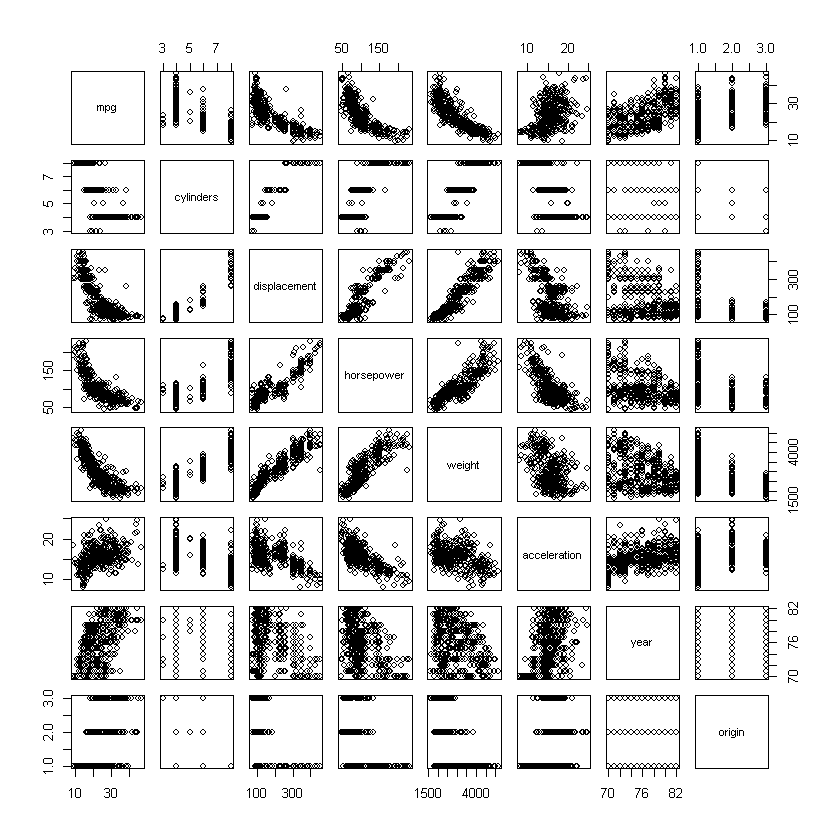

In [7]:
pairs(Auto)

Try to explain the plots by finding some interesting relationships. For example, you will find 
 * a negative correlation between <font color='orange'>mpg</font> and  <font color='orange'>horsepower</font>
 * a positive correlation between  <font color='orange'>horsepower</font> and  <font color='orange'>weight</font>
 
You will find that pairwise scatter plots reveals a lot of information that we need while we are developing our model.

### 1.2 Compute the matrix of correlations between the variables using the function cor(). 
In the previous task, we explore the relationship between two variable with scatter plots. Now, the question is whether or not we can quantify the correlation between each pair of variables. Here we are going to use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cor.html">cor()</a>, which will generate a square matrix, where columns and rows are variables in the dataset. 

In [8]:
cor(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


In the matrix, we will see that some values are positive and the other are negative, and all the values are in the range of -1 to +1. What do the values mean?

* A positive value indicates two variables are positively correlated. That is to say, for any two variables X and Y, an increase in X is associated with an increase in Y as well. The bigger the value, the stronger the positive correlation. 1 shows a perfect, linear positive correlation.
* Zero indicates there is no correlation between two variables.
* A negative value indicates two variables are negatively correlated. In other words, for any two variables X and Y, an increase in X is associated with a decrease in Y. -1 shows a perfect, linear negative correlation.

For more information, please read the following two webpages.
 1. What does a negative correlation coefficient mean?  http://www.investopedia.com/ask/answers/041015/what-does-negative-correlation-coefficient-mean.asp#ixzz4GVtQC8Eu 
 2. What does a negative correlation coefficient mean?  http://www.investopedia.com/ask/answers/041015/what-does-negative-correlation-coefficient-mean.asp#ixzz4GVtIDfM3 

We can also visualize the correlation matrix. The R library we are going to use is <a href="https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/Lattice.html">lattice</a>. (Click the hyper-link and see more details of the lattice package, and look for <font color= "blue">levelplot()</font>). Here you are going to use the <font color= "blue">levelplot()</font> function by passing the output of the <font color= "blue">cor()</font> function as an argument.

In [9]:
library(lattice)

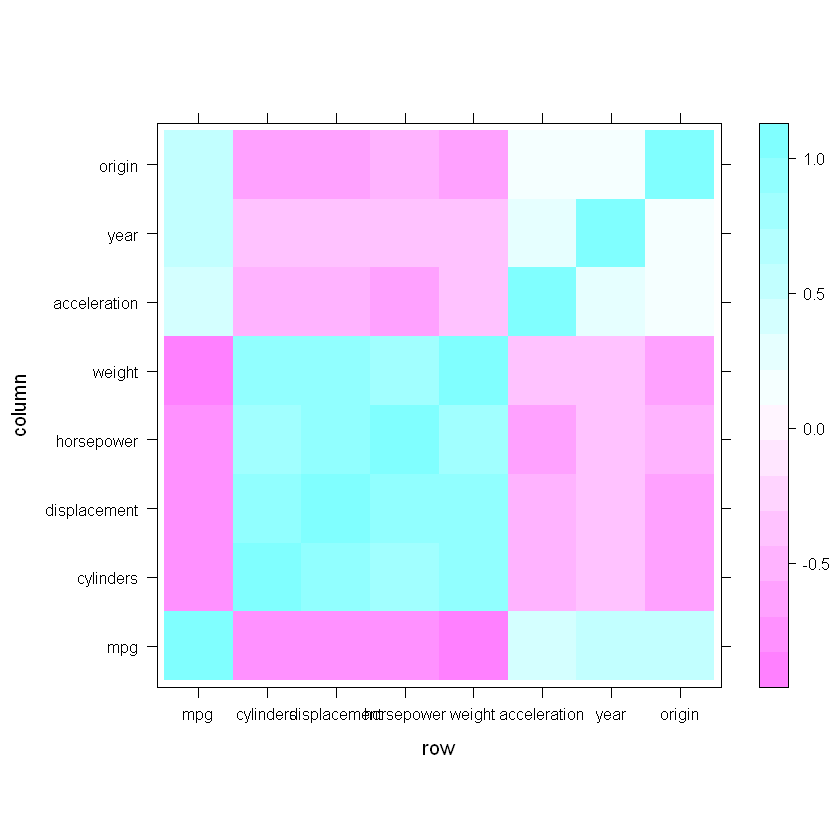

In [10]:
levelplot(cor(Auto))

The above plot shows that some variables are either positively or negatively correlated. 
We can also add the quantified correlation values to the plot, change the color scheme, add a title, etc.

### 1.3 Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables as the predictors.

In this task, we are going to build a multiple linear regression model to predict <font color='orange'>mpg</font> (miles per gallon) by using all the other variables as predictors. By interpreting the results given by the <font color="blue">summary()</font>, you should be able to answer the following questions 
* Is there a relationship between the predictors and the response?
* Which predictors appear to have a statistically significant relationship to the response?
* What does the coefficient for the year variable suggest?

Let's build the regression model with the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/lm.html">lm()</a> function. The formula is "<font color="red">mpg~.</a>"

In [11]:
my_fit = lm(mpg~., data = Auto, method = "qr")

where <font color="red">"mpg~."</font> means the model regresses <font color="orange">mpg</font> on all the other variables. Now, we can print the result of our model with the <font color="blue">summary()</font> function

In [12]:
summary(my_fit)


Call:
lm(formula = mpg ~ ., data = Auto, method = "qr")

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


The output contains: residuals, coefficients, residual standard error, $R^2$, and F-statistic. They are the statistics that you need to assess the accuracy of your model. 

For example, the p-values shows that there is not a statistically significant relationship between <font color='orange'>mpg</font> and <font color='orange'>horsepower</font>, and between <font color='orange'>mpg</font> and <font color='orange'>acceleration</font>. In this case, we might choose to exclude the variables in the model.

In [13]:
summary(lm(mpg~., data = subset(Auto, select=c( -horsepower, -acceleration ))))


Call:
lm(formula = mpg ~ ., data = subset(Auto, select = c(-horsepower, 
    -acceleration)))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0622  -2.0922  -0.0593   1.8165  13.2758 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.781e+01  4.070e+00  -4.375 1.57e-05 ***
cylinders    -4.240e-01  3.221e-01  -1.316   0.1889    
displacement  1.176e-02  6.685e-03   1.759   0.0793 .  
weight       -6.506e-03  5.591e-04 -11.637  < 2e-16 ***
year          7.724e-01  4.977e-02  15.518  < 2e-16 ***
origin        1.250e+00  2.673e-01   4.676 4.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.343 on 386 degrees of freedom
Multiple R-squared:  0.8189,	Adjusted R-squared:  0.8166 
F-statistic: 349.1 on 5 and 386 DF,  p-value: < 2.2e-16


There are many other ways of excluding specific set of variable from your linear model. For example,
```R
summary(lm(mpg~.-horsepower-acceleration, data = Auto))
```

Actually, you can compare the two summaries from the full model and the one excluding <font color="orange">horsepower</font> and <font color='orange'>acceleration</font>. The Adjusted R-squared for the full model is 0.8182, the one for the second model is 0.8166. There is not much difference between the two values. In other words, excluding the two variables makes the model simple but without losing the modeling accuracy.

Let's look at the F-statistic. F-statistic is a good indicator of whether there is a relationship between our predictor and the response variables. The further the F-statistic is from 1 the better it is.
The p-values shows that both models are statistically different from the constant model.  

### 1.4 Use the plot() function to produce diagnostic plots of the linear regression fit.
In this task, we will further diagnose your linear model with different plot. As discussed in the lecture, we need to check the following assumptions:
* <font color="red">Constant variance</font>
* <font color="red">linearity</font> 
* <font color="red">Normality</font>


In order to do so, we need the <font color = "blue">plot()</font> function. Without specifying which plot to show, the function will give us four diagnostic plots as follows. The argument should be the object returned by lm(). 

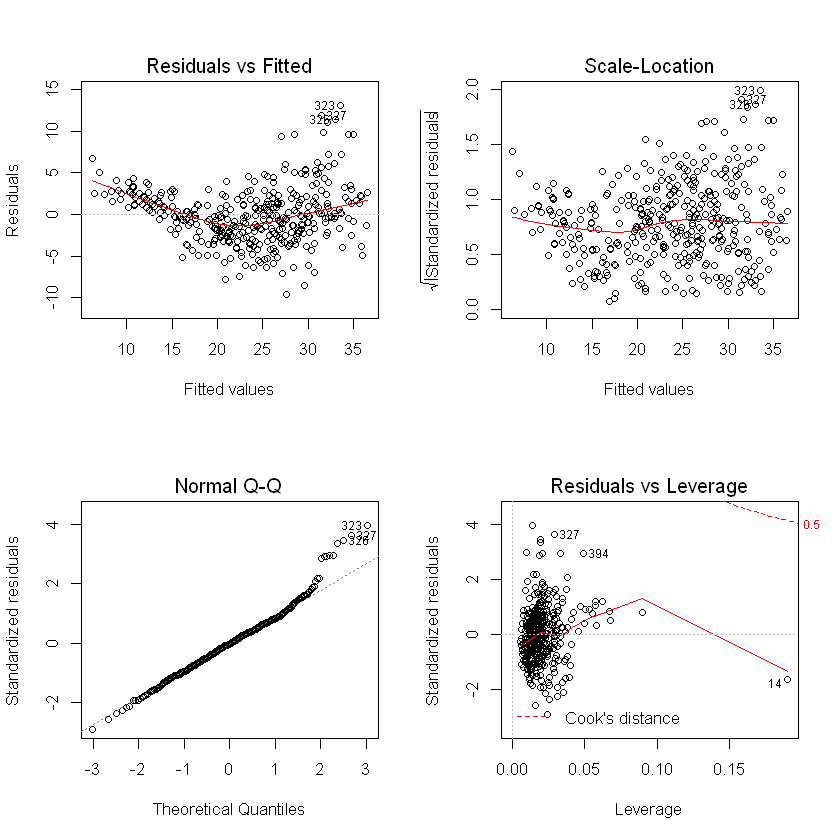

In [14]:
par(mfcol=c(2,2)) # generate 2*2 plots
plot(my_fit)

The diagnostic plots show residuals in four different ways.

1. The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>mpg </font>and all the predictors, as the residuals are not scattered evenly.
* The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely? It is good if residuals are lined well on the straight dashed line.  What do you think about the normal Q-Q plot above? Of course it cannot be a perfect straight line and this will be your call. it seems that the residuals are distributed normally. 
* The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

* The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. How do we identify those samples? We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. The fourth plot shows some outliers, such as 14. However, we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

You can also choose to just show one of the four plots. For example, if you would like to print the residual plot for the residual analysis, add one more argument to the plot() function, which is "<font color="red">which = 1</font>".

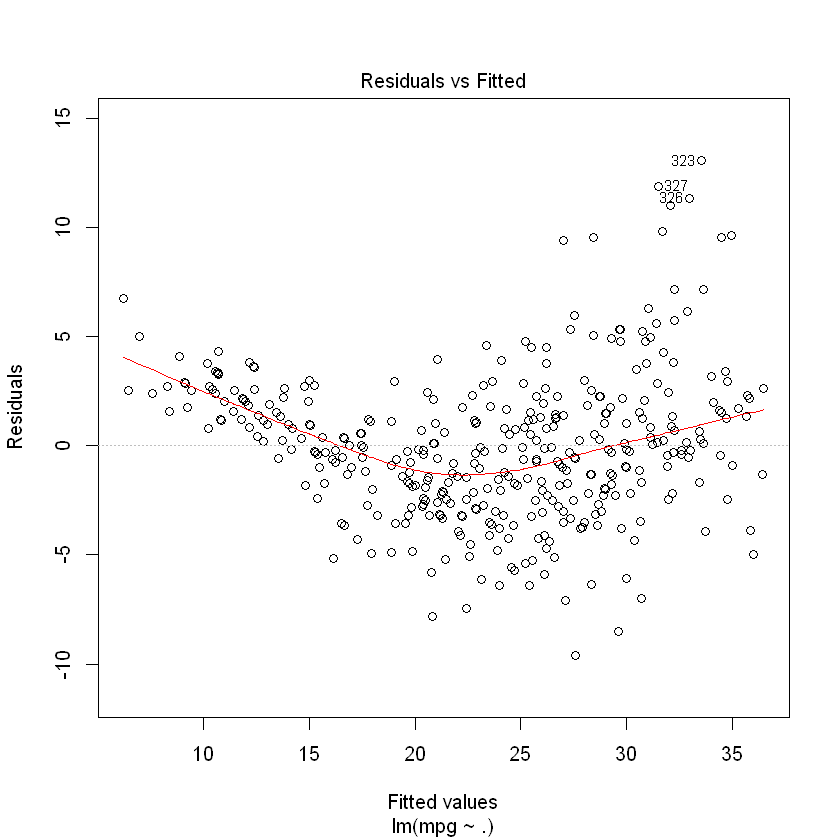

In [15]:
plot(my_fit, which=1)

### 1.5 Use the ":" symbol to fit linear regression models with interaction effects.
Do any interactions appear to be statistically significant? Here we would like to explore some possible interaction between variables. For example, let's try to check whether or not the interaction between <font color="orange">horsepower</font> and <font color="orange">weight</font> can affect the model accuracy. Instead of listing all the predictors, we can update the linear model fitted in Question 1.3. The function that you are going to use is <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/update.html">update()</a>.

In [35]:
my_fit.update <- update(my_fit, .~. + horsepower:weight)
summary(my_fit.update)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + year + origin + horsepower:weight, data = Auto, 
    method = "qr")

Residuals:
   Min     1Q Median     3Q    Max 
-8.589 -1.617 -0.184  1.541 12.001 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.876e+00  4.511e+00   0.638 0.524147    
cylinders         -2.955e-02  2.881e-01  -0.103 0.918363    
displacement       5.950e-03  6.750e-03   0.881 0.378610    
horsepower        -2.313e-01  2.363e-02  -9.791  < 2e-16 ***
weight            -1.121e-02  7.285e-04 -15.393  < 2e-16 ***
acceleration      -9.019e-02  8.855e-02  -1.019 0.309081    
year               7.695e-01  4.494e-02  17.124  < 2e-16 ***
origin             8.344e-01  2.513e-01   3.320 0.000986 ***
horsepower:weight  5.529e-05  5.227e-06  10.577  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.931 on 383 degrees of freedom
Mul

You can compare the summary above with that generated by the model without the interaction terms. You will find the model with the interaction term explains more variation of the data than the one without interaction, see the Adjusted R-squared score.

We can also use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/anova.lm.html">anova()</a> function to compare models. Note that the <font color="blue">anova()</font> function has one strong requirement when comparing two models: <font color="red">one model must be contained within the other</font>. In other words, all the terms of the smaller model must appear in the larger model. Otherwise, the comparison is impossible.

In [36]:
anova(my_fit.update, my_fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
383,3290.884,NA,NA,NA,NA
384,4252.213,-1,-961.3283,111.8814,4.11858e-23


The p-value shows that the two models are statistically different as The p-value is very low. It means that adding the interaction term does make a difference.

Try the following script, which transforms <font color="orange"> horsepower</font> with a log() function.

In [18]:
summary(update(my_fit, . ~ . - horsepower + log(horsepower)))


Call:
lm(formula = mpg ~ cylinders + displacement + weight + acceleration + 
    year + origin + log(horsepower), data = Auto, method = "qr")

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3115 -2.0041 -0.1726  1.8393 12.6579 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     27.254005   8.589614   3.173  0.00163 ** 
cylinders       -0.486206   0.306692  -1.585  0.11372    
displacement     0.019456   0.006876   2.830  0.00491 ** 
weight          -0.004266   0.000694  -6.148 1.97e-09 ***
acceleration    -0.292088   0.103804  -2.814  0.00515 ** 
year             0.705329   0.048456  14.556  < 2e-16 ***
origin           1.482435   0.259347   5.716 2.19e-08 ***
log(horsepower) -9.506436   1.539619  -6.175 1.69e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.18 on 384 degrees of freedom
Multiple R-squared:  0.837,	Adjusted R-squared:  0.834 
F-statistic: 281.6 on 7 and 384 DF,  p-value: 

Try to explain the summary by yourself.

## Question 2.  Analyzing sales of child car seats at 400 different stores.  

The following questions should be answered using the Carseats data set packaged in the ISLR library. In this task, we will learn how to handle qualitative variables (or categorical variables) in linear regression. We already imported the <font color="red">ISLR</font> library. Next, the <a href="http://127.0.0.1:12351/library/ISLR/html/Carseats.html">Carseats</a> data should be loaded and inspected. Similar to what we have done in question 1, we can use, for example, the <font color="blue">head()</font> function and the <font color="blue">str()</font>.

In [19]:
library(ISLR)

In [20]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


As you can see, the data frame contains 400 observations, each of which has 11 variables. (The following detail is copied and pasted from <a href="https://cran.r-project.org/web/packages/ISLR/ISLR.pdf">here</a>)
* <font color="orange">Sales</font> Unit sales (in thousands) at each location
* <font color="orange">CompPrice</font> Price charged by competitor at each location
* <font color="orange">Income</font> Community income level (in thousands of dollars)
* <font color="orange">Advertising</font> Local advertising budget for company at each location (in thousands of dollars)
* <font color="orange">Population</font> Population size in region (in thousands)
* <font color="orange">Price</font> Price company charges for car seats at each site
* <font color="orange">ShelveLoc</font> A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* <font color="orange">Age</font> Average age of the local population
* <font color="orange">Education</font> Education level at each location
* <font color="orange">Urban</font> A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* <font color="orange">US</font> A factor with levels No and Yes to indicate whether the store is in the US or not

Assume that we are going to build a linear regression model to predict <font color="orange">Sales</font> by using all the other variables as predictors. We are interested in analyzing which explanatory variables (i.e., predictors) are strongly associated with <font color="orange">Sales</font>.

### 2.1 Fit a multiple regression model to predict sales as a function of all the other variables, being careful to handle the qualitative variables.

Now it should be easy for you to build a multiple linear regression model to predict <font color="orange">sales</font> by using all the other variables as predictors. What you should pay attention to is how the <font color="blue"> lm() </font> treats categorical variables. What you should do is to fit the model and print the summary.

In [21]:
fit1 <- lm(Sales ~., data = Carseats, method ='qr')
fit1


Call:
lm(formula = Sales ~ ., data = Carseats, method = "qr")

Coefficients:
    (Intercept)        CompPrice           Income      Advertising  
      5.6606231        0.0928153        0.0158028        0.1230951  
     Population            Price    ShelveLocGood  ShelveLocMedium  
      0.0002079       -0.0953579        4.8501827        1.9567148  
            Age        Education         UrbanYes            USYes  
     -0.0460452       -0.0211018        0.1228864       -0.1840928  


Print out the summary of your fitted linear model:

In [22]:
summary(fit1)


Call:
lm(formula = Sales ~ ., data = Carseats, method = "qr")

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

You have seen that the <font color='blue'>str()</font> shows that <font color='orange'>ShelveLoc</font> is a categorical variable (or factor), which can take values on "bad", "Medium" and "Good". To interpret a trinary variable, the linear model in R generates two binary variables, "ShelveLocGood" and "ShelveLocMedium". In other words, for a categorical variable that can take n values, we need to introduce n-1 binary variables.  

As discussed in Section 3.6.6 in the textbook, "the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/contrasts.html"><font color="blue">contrasts()</font></a> function returns the coding that R uses for the dummy variables."

In [23]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


<font color="blue">contrasts()</font></a> function sets and views the contrasts associated with a factor. 

In [24]:
contrasts(Carseats$ShelveLoc) = contr.treatment(length(unique(Carseats$ShelveLoc)))
summary(lm(Sales~., data = Carseats))


Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice    0.0928153  0.0041477  22.378  < 2e-16 ***
Income       0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising  0.1230951  0.0111237  11.066  < 2e-16 ***
Population   0.0002079  0.0003705   0.561    0.575    
Price       -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLoc2   4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLoc3   1.9567148  0.1261056  15.516  < 2e-16 ***
Age         -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education   -0.0211018  0.0197205  -1.070    0.285    
UrbanYes     0.1228864  0.1129761   1.088    0.277    
USYes       -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.019 on 388 degrees of freedom
Mul

Can you see the difference?

### 2.2 For which of the predictors can you reject the null hypothesis <font color="red">H0: j = 0</font>?

In order to answer this question, we need to look at the p-value in the summary, which is indicated by Pr(>|t|).
For the predictors which have the low p-value (less than 0.01), we can reject the null hypothesis. What are the predictors that have a strong association with the predictor?

Answer: CompPrice, Income, Advertising, Price, ShelveLoc, Age

### 2.3 On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome

In this task, we are going to build a new multiple linear regression model. The new model includes the predictors which had the significant association with the response variable in the previous model. We are going to explore the difference between a full model and a model with less but meaningful predictors. Here we will use the variables identified in Question 2.2.

In [25]:
fit2 <- lm(Sales~ CompPrice + Income + Advertising + Price + ShelveLoc + Age, data = Carseats)
fit2


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age, data = Carseats)

Coefficients:
(Intercept)    CompPrice       Income  Advertising        Price   ShelveLoc2  
    5.47523      0.09257      0.01578      0.11590     -0.09532      4.83567  
 ShelveLoc3          Age  
    1.95199     -0.04613  


Print out the summary of your fitted linear model:

In [26]:
summary(fit2)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7728 -0.6954  0.0282  0.6732  3.3292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.475226   0.505005   10.84   <2e-16 ***
CompPrice    0.092571   0.004123   22.45   <2e-16 ***
Income       0.015785   0.001838    8.59   <2e-16 ***
Advertising  0.115903   0.007724   15.01   <2e-16 ***
Price       -0.095319   0.002670  -35.70   <2e-16 ***
ShelveLoc2   4.835675   0.152499   31.71   <2e-16 ***
ShelveLoc3   1.951993   0.125375   15.57   <2e-16 ***
Age         -0.046128   0.003177  -14.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.019 on 392 degrees of freedom
Multiple R-squared:  0.872,	Adjusted R-squared:  0.8697 
F-statistic: 381.4 on 7 and 392 DF,  p-value: < 2.2e-16


### 2.4 How well do the models in <font color="red">2.1</font> and <font color="red">2.3</font> fit the data?

Now, we want to compare these two models. For this purpose, we examine the models using the following items:
* Look at the <font color="red">R-squared</font> and <font color="red">F</font> statistics and the corresponding p-values.
* Check the residuals with various residual plots.
* Perform F-tests by comparing the two models using the <font color="blue">anova()</font> function

As can be seen, there is not much difference between the full model and the one with less predictors. The multiple R-squared and the adjusted R-squared scores slightly drops. The trade-off between simple model and modeling accuracy is very small. In this case, we would like to choose the simple model.

Of course, you can also compare the diagnostic plots, for example

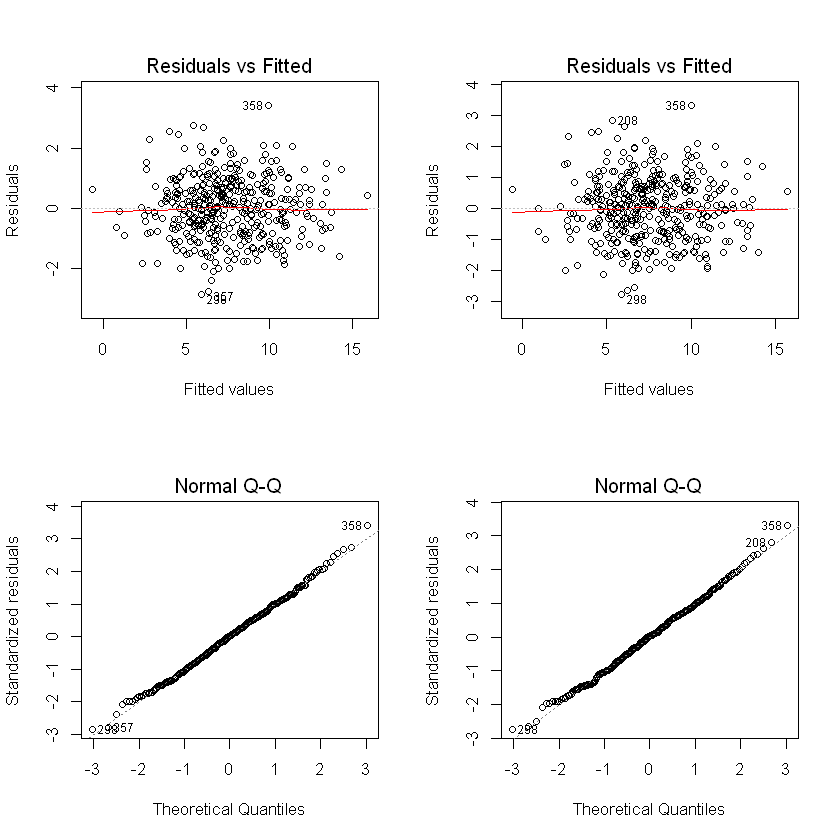

In [27]:
par(mfcol=c(2,2))
plot(fit1, which = 1)
plot(fit1, which = 2)
plot(fit2, which = 1)
plot(fit2, which = 2)

The plots show that both models comply with the assumptions.
We can also use the <font color="blue">anova</font> function.

In [28]:
anova(fit1, fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
388,402.8335,NA,NA,NA,NA
392,407.3869,-4,-4.553347,1.09642,0.3579599


The p-value is quite large, so we cannot reject the null hypothesis. It is not statistically significant that the difference between the full model and the model with only the coefficients strongly associated with the response. In regard to the interpretability of the model, we'd prefer a model with less predictors.

### 2.5 Select the best regression variables with the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/step.html">step()</a> function.

Instead of manually selecting a subset of variables that are strongly associated with the predictor, R provides some automatic approaches of variable selection. Here, you are going to study how to use the <font color="blue">step()</font></a> function. This function can perform stepwise regression, either forward or backward. For more details, please refer to section 11.7 of "<a href="http://ebookcentral.proquest.com.ezproxy.lib.monash.edu.au/lib/monash/detail.action?docID=680900">R Cookbook"</a.>

The step() function should give you the same model as we just generated according to the P-Value.

In [39]:
model.bwd = step(fit1, direction="backward")

Start:  AIC=26.82
Sales ~ CompPrice + Income + Advertising + Population + Price + 
    ShelveLoc + Age + Education + Urban + US

              Df Sum of Sq     RSS    AIC
- Population   1      0.33  403.16  25.15
- Education    1      1.19  404.02  26.00
- Urban        1      1.23  404.06  26.04
- US           1      1.57  404.40  26.38
<none>                      402.83  26.82
- Income       1     76.16  478.99  94.09
- Advertising  1    127.14  529.97 134.54
- Age          1    217.44  620.27 197.48
- CompPrice    1    519.91  922.74 356.35
- ShelveLoc    2   1053.20 1456.03 536.80
- Price        1   1323.23 1726.06 606.85

Step:  AIC=25.15
Sales ~ CompPrice + Income + Advertising + Price + ShelveLoc + 
    Age + Education + Urban + US

              Df Sum of Sq     RSS    AIC
- Urban        1      1.15  404.31  24.29
- Education    1      1.36  404.52  24.49
- US           1      1.89  405.05  25.02
<none>                      403.16  25.15
- Income       1     75.94  479.10  92.18

As shown above, the best model is selected based on AIC after four steps. The best model has <font color="orange">CompPrice</font>, <font color="orange">Income</font>, <font color="orange">Advertising</font>, <font color="orange">Price</font>, <font color="orange">ShelveLoc</font> and <font color="orange">Age</font> as predictors. 

The best model learned by the <font color="blue">step()</font> function is exactly the same as model derived in Question 2.3. You can print out the summary of the model using the <font color="blue">summary()</font> function.

AIC and BIC hold the same interpretation in terms of model comparison. That is, the larger difference in either AIC or BIC indicates stronger evidence for one model over the other (the lower the better). It's just the the AIC doesn't penalize the number of parameters as strongly as BIC. There is also a correction to the AIC (the AICc) that is used for smaller sample sizes.

Model with lower AIC would be the preferred one.

Smaller BIC (further left on the number line) is better

In [30]:
summary(model.bwd)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age, data = Carseats, method = "qr")

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7728 -0.6954  0.0282  0.6732  3.3292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.475226   0.505005   10.84   <2e-16 ***
CompPrice    0.092571   0.004123   22.45   <2e-16 ***
Income       0.015785   0.001838    8.59   <2e-16 ***
Advertising  0.115903   0.007724   15.01   <2e-16 ***
Price       -0.095319   0.002670  -35.70   <2e-16 ***
ShelveLoc2   4.835675   0.152499   31.71   <2e-16 ***
ShelveLoc3   1.951993   0.125375   15.57   <2e-16 ***
Age         -0.046128   0.003177  -14.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.019 on 392 degrees of freedom
Multiple R-squared:  0.872,	Adjusted R-squared:  0.8697 
F-statistic: 381.4 on 7 and 392 DF,  p-value: < 2.2e-16


### 2.6 Expand the model in <font color="red">2.3</font> with interaction effects using the <font color="red">:</font> symbols. 
In order to further explore the data set and study the model, we want to investigate how the potential interactions between predictors can effect the linear model. Here we'd like to try <font color="blue">income: advertising</font>,  <font color="blue">price:age</font>, or both. Do any interactions appear to be statistically significant?

The function you used is the <font color="blue">update()</font> function. Remember to print out the summary of your fitted models.

In [42]:
fit3 = update(fit2, .~. + Income:Advertising)
summary(fit3)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age + Income:Advertising, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8365 -0.7154  0.0082  0.6731  3.3728 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.7252919  0.5083105  11.263  < 2e-16 ***
CompPrice           0.0929201  0.0040888  22.725  < 2e-16 ***
Income              0.0106546  0.0025709   4.144 4.18e-05 ***
Advertising         0.0615973  0.0206746   2.979  0.00307 ** 
Price              -0.0952009  0.0026469 -35.967  < 2e-16 ***
ShelveLoc2          4.8476841  0.1512156  32.058  < 2e-16 ***
ShelveLoc3          1.9578038  0.1242880  15.752  < 2e-16 ***
Age                -0.0454636  0.0031575 -14.399  < 2e-16 ***
Income:Advertising  0.0007805  0.0002760   2.828  0.00493 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.01 on 391 degrees of freedom
Multiple R-squar

In the ANOVA test, the small p-value indicates that the models are significantly different. If we set the significant code to 0.01, adding just Income: Advertising to the model derived in Question 2.3 makes a significant difference.

### 2.7 Using the model from <font color="red">2.6</font>, obtain 95% confidence intervals for the coefficients.

In [43]:
confint(fit3, level = 0.95)

,2.5 %,97.5 %
(Intercept),4.7259282932,6.724655507
CompPrice,0.0848812789,0.100958927
Income,0.0056000685,0.015709098
Advertising,0.0209499979,0.102244701
Price,-0.1004048098,-0.089996895
ShelveLoc2,4.5503868572,5.144981440
ShelveLoc3,1.7134473389,2.202160234
Age,-0.0516713660,-0.039255919
Income:Advertising,0.0002378429,0.001323225


### 2.8 Is there evidence of outliers or high leverage observations in the model from <font color="red">2.6</font>?

There are many ways of checking if there are some outliers in your data. As discussed in the core textbook, we can use residual plots to identify outliers. Let's have a look

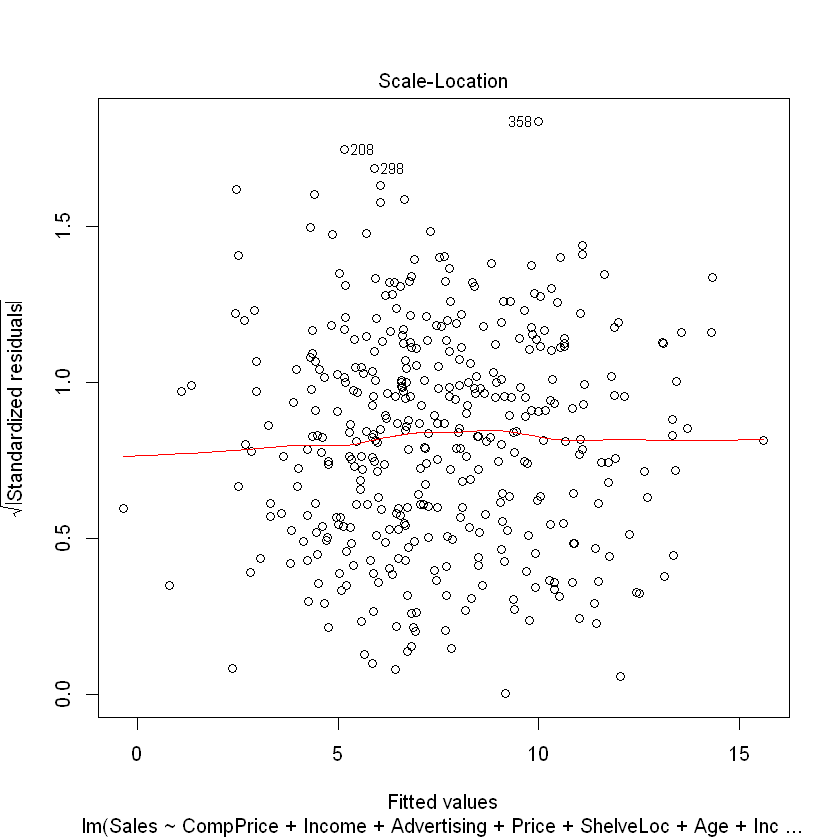

In [50]:
plot(fit3, which = 3)

In the plot above, we can find some data points that stay a bit far from the majority of the points. Can we conclude that there are some outliers?

Let's use the <a href="http://artax.karlin.mff.cuni.cz/r-help/library/art/html/outlierTest.html"><font color="blue">outlierTest()</font></a> function to do an outlier test. The function will report the Bonferroni p-values for studentized residuals in linear regression models.

In [45]:
library(car)

Loading required package: carData


In [46]:
outlierTest(fit3, cutoff=0.05, digits = 1)

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferonni p
358 3.417326         0.00069897      0.27959

The test shows that data point <font color='red'>358</font> is not an outlier.

Are there any influential data points? To answer this question, we can use the <font color="blue">influencePlot()</font> function. If influential points are identified, the function will also return a data frame with the hat values, Studentized residuals and Cook's distance.

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

,StudRes,Hat,CookD
76,0.4635676,0.07562967,0.001957504
208,3.0767511,0.02340162,0.024669972
248,2.6373894,0.03960442,0.031393092
306,1.2764466,0.09078717,0.018047758
357,-2.5051422,0.04076356,0.029238021
358,3.4173263,0.01987199,0.025608697


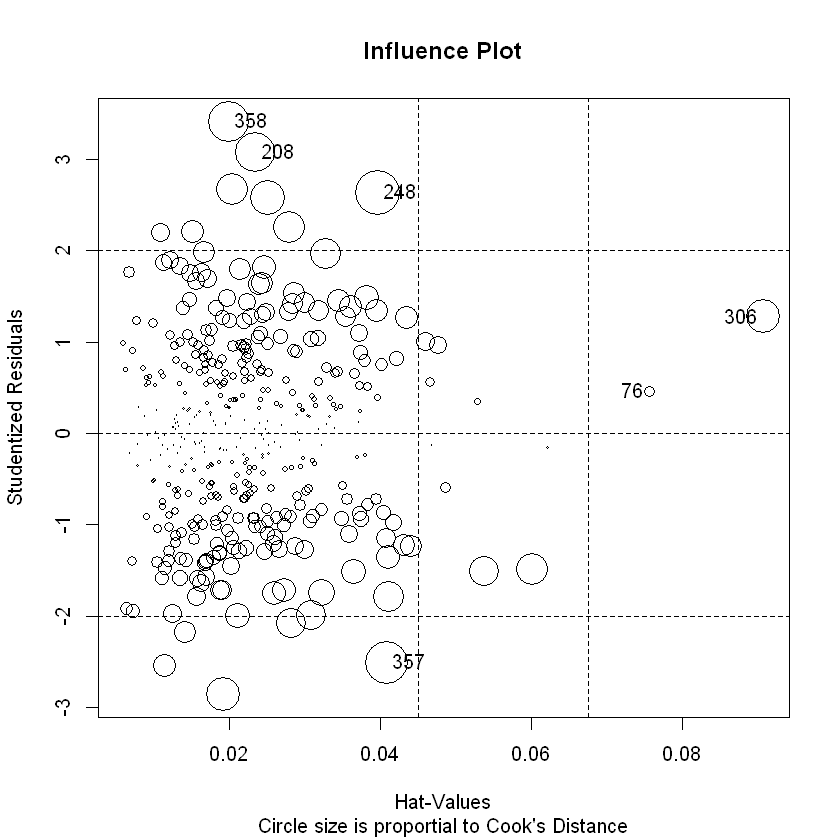

In [51]:
influencePlot(fit3, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

In the influence plot, the two dashed vertical lines are drawn at twice and three times the average hat value respectively. The three horizontal lines are drawn at -2, 0 and 2 on the Studentized-residual scale.